<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de Inventarios

Se nos plantea el siguiente problema:

Se tiene una empresa cuya demanda mensual de un cierto producto, considerando la probabilidad empirica de que esta se de:

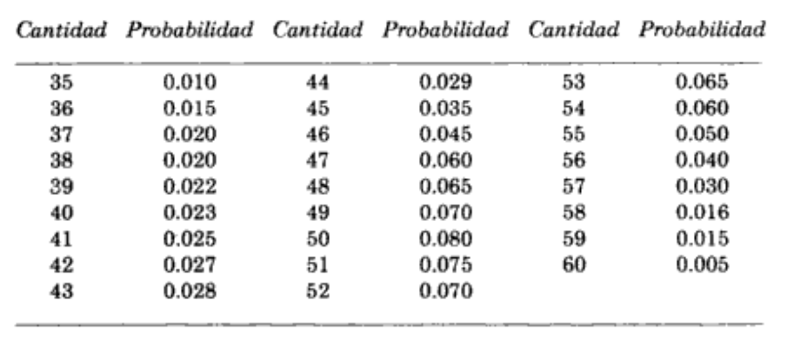

De este producto, se puede realizar un pedido en caso de que se este por debajo de nivel de reorden, el tiempo que se tarda en entregar el producto, asi como la probabilidad de que esta ocurra, son:

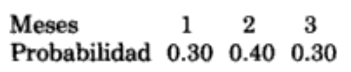

La venta del producto depende del mes en el que nos encontremos, llamados factores estacionales, los cuales se muestran en la siguiente tabla:

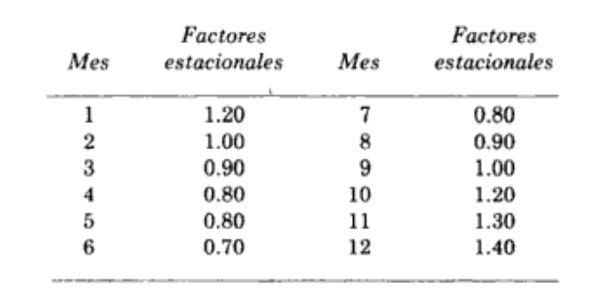

La informacion con respecto a costos esta dada por:

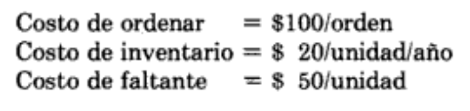

Al inicio, se tomara la cantidad a ordenar $(q)$ como $q=200$ y el nivel de reorden $(R)$ como 100, ademas de tener un inventario de $150$ unidades, ¿Cual es la cantidad optima a ordenar y el nivel de reorden optimo?

## Implementacion del problema.

Primero que nada, se utilizo el metodo de la transformada inversa para simular la demanda del mes y el tiempo de entrega de una orden, se genera un numero aleatorio y si cae dentro de un intervalo generado por la probabilidad empirica (se suman acumulativamente las probabilidades empiricas para obtener estos intervalos).

Importamos librerias.

In [88]:
import numpy as np #Numpy para generar arreglos y hacer operaciones matematicas
import matplotlib.pyplot as plt #matplotlib para hacer graficas
import random as rnd #Random para generar numeros aleatorios
import pandas as pd #Pandas para crear dataframes
from tabulate import tabulate #Tabulate para crear tablas

Implementamos la funcion que dara el tiempo de entrega de una orden en un cierto mes.

In [23]:
def TE(): #Tiempo de entrega de la cantidad a ordenar
  u = rnd.uniform(0,1) #Generamos un numero aleatorio
  if 0 <= u < 0.3:
    return 1 #Tomando en cuenta las probabilidades de tiempos de entrega, se retorna el valor de acuerdo a los valores sumados acumuladamente
  elif 0.3 <= u < 0.7:
    return 2 #La longitud del intervalo es 0.4, tal como se dice en la tabla
  elif 0.7 <= u <= 1:
    return 3 #La longitud del intervalo es 0.3

Ahora implementamos la funcion que nos dara la demanda en ese mes.

In [24]:
def Demanda(): #Demanda del producto en un mes dado
  u = rnd.uniform(0,1) #Generamos un numero aleatorio
  if 0 <= u < 0.01: #Nuevamente, todos estos intervalos se toman de la probabilidad empirica, aqui representa la longitud de cada uno de los intervalos
    return 35
  elif 0.01 <= u < 0.025:
    return 36
  elif 0.025 <= u < 0.045:
    return 37
  elif 0.045 <= u < 0.065:
    return 38
  elif 0.065 <= u < 0.087:
    return 39
  elif 0.087 <= u < 0.11:
    return 40
  elif 0.11 <= u < 0.135:
    return 41
  elif 0.135 <= u < 0.162:
    return 42
  elif 0.162 <= u < 0.190:
    return 43
  elif 0.190 <= u < 0.219:
    return 44
  elif 0.219 <= u < 0.254:
    return 45
  elif 0.254 <= u < 0.299:
    return 46
  elif 0.299 <= u < 0.359:
    return 47
  elif 0.359 <= u < 0.424:
    return 48
  elif 0.424 <= u < 0.494:
    return 49
  elif 0.494 <= u < 0.574:
    return 50
  elif 0.574 <= u < 0.649:
    return 51
  elif 0.649 <= u < 0.719:
    return 52
  elif 0.719 <= u < 0.784:
    return 53
  elif 0.784 <= u < 0.844:
    return 54
  elif 0.844 <= u < 0.894:
    return 55
  elif 0.894 <= u < 0.934:
    return 56
  elif 0.934 <= u < 0.964:
    return 57
  elif 0.964 <= u < 0.980:
    return 58
  elif 0.980 <= u < 0.995:
    return 59
  elif 0.995 <= u <= 1:
    return 60

Tambien requeriremos una funcion para los factores estacionales, asi obteniendo la demanda ajustada a estos factores.

In [25]:
def FE(mes): #Factor estacional del mes en el que nos encontramos
  if mes == 1:
    return 1.2
  elif mes == 2:
    return 1
  elif mes == 3:
    return 0.9
  elif mes == 4:
    return 0.8
  elif mes == 5:
    return 0.8
  elif mes == 6:
    return 0.7
  elif mes == 7:
    return 0.8
  elif mes == 8:
    return 0.9
  elif mes == 9:
    return 1
  elif mes == 10:
    return 1.2
  elif mes == 11:
    return 1.3
  elif mes == 12:
    return 1.4

Los costos los tomaremos en cuenta al final, una vez realizada la simulacion, la cual primero sera de un año, y despues podra ir aumentando depende a las simulaciones que necesitemos.

Ahora creamos la funcion que va a realizar la simulacion de la venta del producto, de acuerdo a su demanda.

In [75]:
from pickle import TRUE,FALSE
def Simulacion(q,R,mesestotales,Io): #Simulacion de la venta y compra de producto de acuerdo a la demanda

  mes = 1 #Iniciamos en el mes 1 evidentemente
  invin = [] #Aqui guardaremos todos los inventarios iniciales durante todos los meses
  invin.append(Io) #Guardamos el primer inventario inicial en la lista
  demadj = [] #Aqui guardaremos las demandas ajustadas
  invfin = [] #Aqui guardaremos todos los inventarios finales durante todos los meses
  faltante = [] #En caso de que haya producto faltante, aqui se guardara cuanto
  orden = 0 #Contador de cuantas ordenes ha habido
  ordenes = [] #Registro de todas las ordenes que ha habido
  invprom = [] #Los inventarios promedio mensuales
  hayorden = TRUE #Booleano para saber si hay ordenes pendientes

  while mes <= mesestotales: #La simulacion se hara hasta el ultimo mes
    if mes == 1: #Como en el mes 1 no consideramos faltantes anteriores, lo consideramos un caso especial
      demadj.append(round(FE(mes)*Demanda())) #Obtenemos demanda ajustada y la añadimos a la lista, redondeamos por que nos interesa un numero entero
      invfin.append(invin[mes - 1] - demadj[mes - 1]) #Obtenemos el inventario final en el mes 1
      if invfin[mes - 1] < R: #Si el inventario final es menor que el nivel de reorden, se realiza una orden de producto
        hayorden = TRUE #Hay ordenes pendientes
        orden = orden + 1 #Aumentamos el contador de ordenes
        ordenes.append(orden) #Añadimos el numero de orden
        te = TE() + mes #Obtenemos el tiempo de entrega de la orden
      else:
        hayorden = FALSE #No hay orden pendiente
        te = 0 #No hay tiempo de entrega
        ordenes.append(0) #No se hace una orden
      if invfin[mes - 1] < 0: #Si el inventario final es negativo, hay cantidad faltante
        faltante.append(abs(invfin[mes - 1])) #Añadimos la cantidad faltante a la lista
        invfin[mes - 1] = 0 #Ya no queda inventario, lo consideramos 0
      else:
        faltante.append(0) #Si el inventario final es positivo, no hay faltante
      invprom.append(round((invfin[mes - 1] + invin[mes - 1])/2)) #Obtenemos el inventario promedio del mes
      Io = invfin[mes - 1] #El nuevo inventario inicial sera el inventario final del mes
      mes += 1 #Avanzamos al siguiente mes
    else:
      if hayorden == TRUE: #Si hay ordenes pendientes, se verifica cuando se realiza la orden
        if mes == te + 1: #Si ya se ha llegado al mes en donde se realiza la entrega, se suma al inventario inicial
          Io = Io + q
          hayorden = FALSE #Ya no hay ordenes pendientes
        if faltante[mes - 2] > 0: #Si hay faltante, se le resta al inventario inicial para satisfacerlo
          Io = Io - faltante[mes - 2]
      else:
        if faltante[mes - 2] > 0: #Si hay faltante, se le resta al inventario inicial para satisfacerlo
          Io = Io - faltante[mes - 2]
      invin.append(Io)
      demadj.append(round(FE(mes)*Demanda()))
      invfin.append(invin[mes - 1] - demadj[mes - 1])
      if hayorden == FALSE: #Si no hay ordenes pendientes, se verifica si se necesita ordenar
        if invfin[mes - 1] < R:
          hayorden = TRUE
          orden = orden + 1
          ordenes.append(orden)
          te = TE() + mes
        else:
          hayorden = FALSE
          te = 0
          ordenes.append(0)
      else:
        ordenes.append(0)
      if invfin[mes - 1] < 0:
        faltante.append(abs(invfin[mes - 1]))
        invfin[mes - 1] = 0
      else:
        faltante.append(0)
      invprom.append(round((invfin[mes - 1] + invin[mes - 1])/2))
      Io = invfin[mes - 1]
      mes += 1
  return invin, demadj, invfin, faltante, ordenes, invprom #Devolvemos los datos de la simulacion

La simulacion se hara por 12 meses, con $q = 200$, $R = 100$ e inventario inicial de $150$ unidades.

In [76]:
q = 200 #Cantidad a ordenar
R = 100 #Nivel de reorden
mesestotales = 12 #Numero de meses
Io = 150 #Inventario inicial

Realizamos la simulacion.

In [80]:
invin,demadj,invfin,faltante,ordenes,invprom = Simulacion(q,R,mesestotales,Io) #Simulacion

Creamos el dataframe para visualizar el resultado de la simulacion de 12 meses, aunque como se dijo antes, pueden ser mas.

In [90]:
resultados = {"Mes": [1,2,3,4,5,6,7,8,9,10,11,12],"Inventario Inicial": invin, "Demanda Ajustada": demadj, "Inventario Final": invfin, "Faltante": faltante, "Orden": ordenes, "Inventario Promedio": invprom} #Creamos el dataframe
df = pd.DataFrame(resultados) #Convertimos el diccionario en un dataframe
print(tabulate(df, headers='keys', tablefmt='psql')) #Imprimimos la tabla

+----+-------+----------------------+--------------------+--------------------+------------+---------+-----------------------+
|    |   Mes |   Inventario Inicial |   Demanda Ajustada |   Inventario Final |   Faltante |   Orden |   Inventario Promedio |
|----+-------+----------------------+--------------------+--------------------+------------+---------+-----------------------|
|  0 |     1 |                  150 |                 55 |                 95 |          0 |       1 |                   122 |
|  1 |     2 |                   95 |                 38 |                 57 |          0 |       0 |                    76 |
|  2 |     3 |                   57 |                 47 |                 10 |          0 |       0 |                    34 |
|  3 |     4 |                  210 |                 36 |                174 |          0 |       0 |                   192 |
|  4 |     5 |                  174 |                 32 |                142 |          0 |       0 |         

Para realizar la grafica, consideraremos el faltante como inventario "negativo", para temas de visualizacion, graficamos el inventario final.

In [92]:
invfingraf = [] #Inventario final considerando faltante
for i in range(mesestotales): #Si el inventario final es cero, incluimos el faltante negativo
  if invfin[i] == 0:
    invfingraf.append(-faltante[i]) #Inventario final cero, añadimos el faltante negativo
  else:
    invfingraf.append(invfin[i]) #Dejamos el inventario tal y como esta.

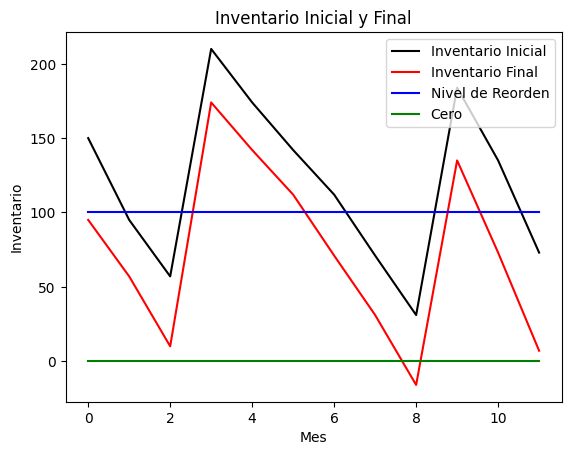

In [107]:
plt.plot(invin,color = "black") #Grafica de inventario inicial
plt.plot(invfingraf, color = "red") #Grafica de inventario final
plt.plot(np.linspace(0,11,1000),100 * np.ones(1000), color = "blue") #Nivel de reorden
plt.plot(np.linspace(0,11,1000),np.zeros(1000), color = "green") #Para notar el faltante
plt.title("Inventario Inicial y Final")
plt.xlabel("Mes")
plt.ylabel("Inventario")
plt.legend(["Inventario Inicial","Inventario Final","Nivel de Reorden","Cero"])
plt.show() #Mostramos la grafica

Como podemos ver en la grafica, solo en el mes 9 (por los indices de los arreglos la grafica estaria atrasada un mes, habria faltante), sin embargo justo despues, hay una orden que lo abastece, regresando el inventario por arriba de cero, ademas que muy poco del tiempo estamos por encima del nivel de reorden.

Para calcular costos, usamos los costos puestos arriba, multiplicando por las ordenes hechas, unidades promedio anuales en inventario y unidades faltantes.

Costo de orden.

In [111]:
costoorden = 100 * max(ordenes) #Costo de todas las ordenes que se hicieron
print("$",costoorden)

$ 300


Costo de inventario.

In [112]:
suma = 0 #Sumaremos todas las unidades que estuvieron en inventario en promedio
for i in range(mesestotales):
  suma = suma + invprom[i] #Sumamos las unidades para tener el total de inventario en promedio
costoinv = 20 * suma #Costo del inventario
print("$",costoinv)

$ 23440


Costo de faltante.

In [113]:
sumaf = 0 #Sumaremos todas las unidades de faltante
for i in range(mesestotales):
  sumaf = sumaf + faltante[i] #Sumamos las unidades para tener el total de faltante
costofal = 50 * sumaf #Costo del inventario
print("$",costofal)

$ 800


y para el costo total, sumamos todos los costos:

In [114]:
costototal = costoorden + costoinv + costofal #Costo total
print("$",costototal)

$ 24540
